In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [54]:
# Load preprocessed data 

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [55]:
# Load preprocessed Model

lr_model = joblib.load('../models/linear_regression_model.pkl')
ridge_model = joblib.load('../models/ridge_model.pkl')

print("Data and models loaded successfully!")
print("Test set shape:", X_test.shape)

Data and models loaded successfully!
Test set shape: (102, 13)


In [61]:
# Ensure y_train and y_test are 1D arrays
# Ensure y_train and y_test are 1D arrays
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.ravel()
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values.ravel()
elif isinstance(y_train, np.ndarray):
    y_train = y_train.ravel()
    y_test = y_test.ravel()

print("y_train shape:", y_train.shape)  # Should be (n,)
print("y_test shape:", y_test.shape)


y_train shape: (404,)
y_test shape: (102,)


In [62]:
# Linear Regression
y_test_pred_lr = lr_model.predict(X_test).ravel()  # Ensure 1D
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)

# Ridge Regression
y_test_pred_ridge = ridge_model.predict(X_test).ravel()  # Ensure 1D
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

In [63]:
print("\nModel Performance on Test Set:")
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")
print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")


Model Performance on Test Set:
Linear Regression:
Mean Squared Error (MSE): 24.29
R² Score: 0.67
Ridge Regression:
Mean Squared Error (MSE): 24.31
R² Score: 0.67


residuals_lr shape: (102,)


Text(0, 0.5, 'Residuals')

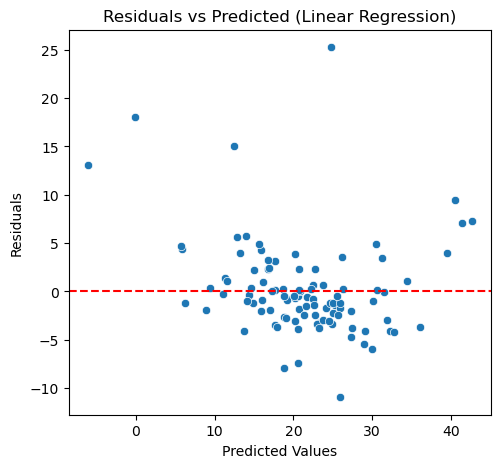

In [65]:
#Step 2: Plot residuals to check Linear Regression assumptions
residuals_lr = y_test - y_test_pred_lr
print("residuals_lr shape:", residuals_lr.shape)  # Should match y_test

plt.figure(figsize=(12, 5))

# Residuals vs Predicted plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_pred_lr, y=residuals_lr)  # Both are 1D
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted (Linear Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

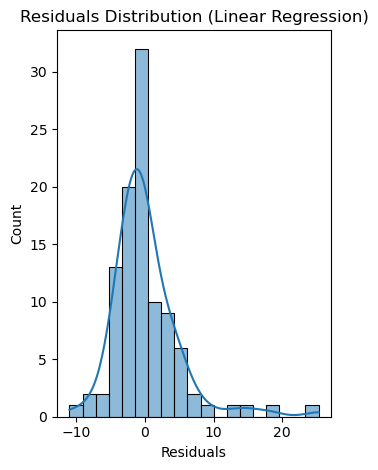

In [66]:
#Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals_lr, kde=True)
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

In [67]:
#Compare model performance with different feature sets
subset_features = ['RM', 'LSTAT']
X_train_subset = X_train[subset_features]
X_test_subset = X_test[subset_features]

# Train and evaluate Linear Regression with subset
lr_subset = LinearRegression()
lr_subset.fit(X_train_subset, y_train)
y_test_pred_subset = lr_subset.predict(X_test_subset).ravel()
mse_subset = mean_squared_error(y_test, y_test_pred_subset)
r2_subset = r2_score(y_test, y_test_pred_subset)

In [68]:
print("\nPerformance with Subset Features (RM, LSTAT):")
print(f"Mean Squared Error (MSE): {mse_subset:.2f}")
print(f"R² Score: {r2_subset:.2f}")


Performance with Subset Features (RM, LSTAT):
Mean Squared Error (MSE): 31.24
R² Score: 0.57
